In [1]:
import zeldovich as z
import numpy as np
import matplotlib.pyplot as plt
import gc
import time
import scipy.stats as st

In [2]:
Lbox=256
RedShift = 0


### This section creates N_particle = 256^3  and does interpolation for different Grid Sizes

In [3]:
inst_Np256 = z.zeldovich(GridSize=256, XSize = 256,Seed = 300000)
Position = inst_Np256.Position(RedShift)
PositionX = Position[0,:,:,:].flatten()
PositionY = Position[1,:,:,:].flatten()
PositionZ = Position[2,:,:,:].flatten()

a = z.pmInterpolation()
##Computing Residues for Np=256
Res_Ng256_Np256 = a.ngp(PositionX,PositionY,PositionZ,Lbox,GridSize=256)-a.cic(PositionX,PositionY,PositionZ,Lbox,GridSize=256) 
Res_Ng128_Np256 = a.ngp(PositionX,PositionY,PositionZ,Lbox,GridSize=128)-a.cic(PositionX,PositionY,PositionZ,Lbox,GridSize=128)
Res_Ng64_Np256 = a.ngp(PositionX,PositionY,PositionZ,Lbox,GridSize=64)-a.cic(PositionX,PositionY,PositionZ,Lbox,GridSize=64)
Res_Ng32_Np256 = a.ngp(PositionX,PositionY,PositionZ,Lbox,GridSize=32)-a.cic(PositionX,PositionY,PositionZ,Lbox,GridSize=32)


### This section creates N_particle = 128^3  and does interpolation for different Grid Sizes 

In [4]:
inst_Np128 = z.zeldovich(GridSize=128, XSize = 256,Seed = 300000)
Position = inst_Np128.Position(RedShift)
PositionX = Position[0,:,:,:].flatten()
PositionY = Position[1,:,:,:].flatten()
PositionZ = Position[2,:,:,:].flatten()

##Computing Residues for Np=128
Res_Ng256_Np128 = a.ngp(PositionX,PositionY,PositionZ,Lbox,GridSize=256)-a.cic(PositionX,PositionY,PositionZ,Lbox,GridSize=256) 
Res_Ng128_Np128 = a.ngp(PositionX,PositionY,PositionZ,Lbox,GridSize=128)-a.cic(PositionX,PositionY,PositionZ,Lbox,GridSize=128)
Res_Ng64_Np128 = a.ngp(PositionX,PositionY,PositionZ,Lbox,GridSize=64)-a.cic(PositionX,PositionY,PositionZ,Lbox,GridSize=64)
Res_Ng32_Np128 = a.ngp(PositionX,PositionY,PositionZ,Lbox,GridSize=32)-a.cic(PositionX,PositionY,PositionZ,Lbox,GridSize=32)


### This section creates N_particle = 64^3 and does interpolation for different Grid Sizes

In [35]:
inst_Np64 = z.zeldovich(GridSize=64, XSize = 256,Seed = 300000)
Position = inst_Np64.Position(RedShift)
PositionX = Position[0,:,:,:].flatten()
PositionY = Position[1,:,:,:].flatten()
PositionZ = Position[2,:,:,:].flatten()

##Computing Residues for Np=128
Res_Ng256_Np64 = a.ngp(PositionX,PositionY,PositionZ,Lbox,GridSize=256)-a.cic(PositionX,PositionY,PositionZ,Lbox,GridSize=256) 
Res_Ng128_Np64 = a.ngp(PositionX,PositionY,PositionZ,Lbox,GridSize=128)-a.cic(PositionX,PositionY,PositionZ,Lbox,GridSize=128)
Res_Ng64_Np64 = a.ngp(PositionX,PositionY,PositionZ,Lbox,GridSize=64)-a.cic(PositionX,PositionY,PositionZ,Lbox,GridSize=64)
Res_Ng32_Np64 = a.ngp(PositionX,PositionY,PositionZ,Lbox,GridSize=32)-a.cic(PositionX,PositionY,PositionZ,Lbox,GridSize=32)


In [36]:

del Position
del PositionX
del PositionY
del PositionZ
gc.collect()

1630

## Histogram of Number Count difference
## N_ngp - N_cic 

1.0
1.0
1.0
1.0
0.999923528692
1.0
1.0
1.0
0.99764181007
0.999961743136
1.0
1.0


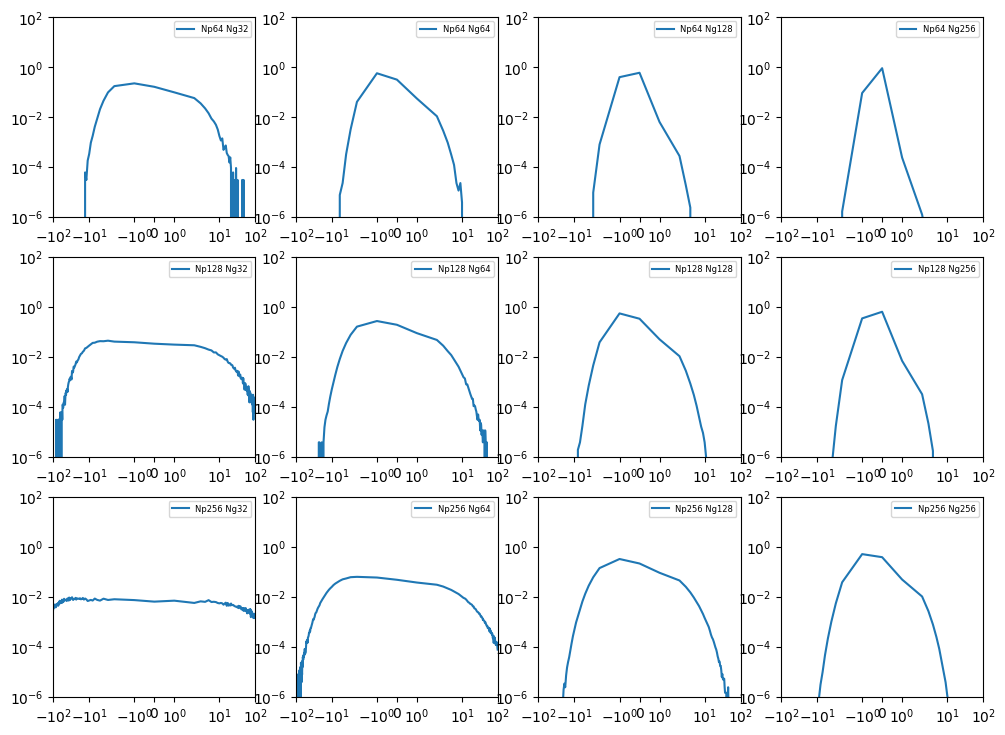

In [37]:
fig=plt.figure(figsize=(12,9), dpi= 100, facecolor='w', edgecolor='k')
plt.title('Countngp-Countcic_box_'+str(Lbox)+'Redshift='+str(RedShift))

plt.subplot(3,4,1)
probd,edges =np.histogram(Res_Ng32_Np64,bins=range(-100,100), density = 1)
plt.plot((edges[0:-1]+edges[1:])/2,probd,label='Np64 Ng32')
plt.legend(loc='best',prop={'size': 6})
plt.ylim([1e-6,100])
plt.xlim([-100,100])
plt.yscale('log')
plt.xscale('symlog')
Edge=(edges[0:-1]+edges[1:])/2.
print np.trapz(probd,Edge)



plt.subplot(3,4,2)
probd,edges =np.histogram(Res_Ng64_Np64,bins=range(-100,100), density = 1)
plt.plot((edges[0:-1]+edges[1:])/2,probd,label='Np64 Ng64')
plt.legend(loc='best',prop={'size': 6})
plt.ylim([1e-6,100])
plt.xlim([-100,100])
plt.yscale('log')
plt.xscale('symlog')
Edge=(edges[0:-1]+edges[1:])/2.
print np.trapz(probd,Edge)

plt.subplot(3,4,3)
probd,edges =np.histogram(Res_Ng128_Np64,bins=range(-100,100), density = 1)
plt.plot((edges[0:-1]+edges[1:])/2,probd,label='Np64 Ng128')
plt.legend(loc='best',prop={'size': 6})
plt.ylim([1e-6,100])
plt.xlim([-100,100])
plt.yscale('log')
plt.xscale('symlog')
Edge=(edges[0:-1]+edges[1:])/2.
print np.trapz(probd,Edge)

plt.subplot(3,4,4)
probd,edges =np.histogram(Res_Ng256_Np64,bins=range(-100,100), density = 1)
plt.plot((edges[0:-1]+edges[1:])/2,probd,label='Np64 Ng256')
plt.legend(loc='best',prop={'size': 6})
plt.ylim([1e-6,100])
plt.xlim([-100,100])
plt.yscale('log')
plt.xscale('symlog')
Edge=(edges[0:-1]+edges[1:])/2.
print np.trapz(probd,Edge)


plt.subplot(3,4,5)
probd,edges =np.histogram(Res_Ng32_Np128,bins=range(-100,100), density = 1)
plt.plot((edges[0:-1]+edges[1:])/2,probd,label='Np128 Ng32')
plt.legend(loc='best',prop={'size': 6})
plt.ylim([1e-6,100])
plt.xlim([-100,100])
plt.yscale('log')
plt.xscale('symlog')
Edge=(edges[0:-1]+edges[1:])/2.
print np.trapz(probd,Edge)






plt.subplot(3,4,6)
probd,edges =np.histogram(Res_Ng64_Np128,bins=range(-100,100), density = 1)
plt.plot((edges[0:-1]+edges[1:])/2,probd,label='Np128 Ng64')
plt.legend(loc='best',prop={'size': 6})
plt.ylim([1e-6,100])
plt.xlim([-100,100])
plt.yscale('log')
plt.xscale('symlog')
Edge=(edges[0:-1]+edges[1:])/2.
print np.trapz(probd,Edge)

plt.subplot(3,4,7)
probd,edges =np.histogram(Res_Ng128_Np128,bins=range(-100,100), density = 1)
plt.plot((edges[0:-1]+edges[1:])/2,probd,label='Np128 Ng128')
plt.legend(loc='best',prop={'size': 6})
plt.ylim([1e-6,100])
plt.xlim([-100,100])
plt.yscale('log')
plt.xscale('symlog')
Edge=(edges[0:-1]+edges[1:])/2.
print np.trapz(probd,Edge)

plt.subplot(3,4,8)
probd,edges =np.histogram(Res_Ng256_Np128,bins=range(-100,100), density = 1)
plt.plot((edges[0:-1]+edges[1:])/2,probd,label='Np128 Ng256')
plt.legend(loc='best',prop={'size': 6})
plt.ylim([1e-6,100])
plt.xlim([-100,100])
plt.yscale('log')
plt.xscale('symlog')
Edge=(edges[0:-1]+edges[1:])/2.
print np.trapz(probd,Edge)


plt.subplot(3,4,9)
probd,edges =np.histogram(Res_Ng32_Np256,bins=range(-100,100), density = 1)
plt.plot((edges[0:-1]+edges[1:])/2,probd,label='Np256 Ng32')
plt.legend(loc='best',prop={'size': 6})
plt.ylim([1e-6,100])
plt.xlim([-100,100])
plt.yscale('log')
plt.xscale('symlog')
Edge=(edges[0:-1]+edges[1:])/2.
print np.trapz(probd,Edge)









plt.subplot(3,4,10)
probd,edges =np.histogram(Res_Ng64_Np256,bins=range(-100,100), density = 1)
plt.plot((edges[0:-1]+edges[1:])/2,probd,label='Np256 Ng64')
plt.legend(loc='best',prop={'size': 6})
plt.ylim([1e-6,100])
plt.yscale('log')
plt.xlim([-100,100])
plt.xscale('symlog')
Edge=(edges[0:-1]+edges[1:])/2.
print np.trapz(probd,Edge)

plt.subplot(3,4,11)
probd,edges =np.histogram(Res_Ng128_Np256,bins=range(-100,100), density = 1)
plt.plot((edges[0:-1]+edges[1:])/2,probd,label='Np256 Ng128')
plt.legend(loc='best',prop={'size': 6}) 
plt.ylim([1e-6,100])
plt.xlim([-100,100])
plt.xscale('symlog')
plt.yscale('log')
Edge=(edges[0:-1]+edges[1:])/2.
print np.trapz(probd,Edge)

plt.subplot(3,4,12)
probd,edges =np.histogram(Res_Ng256_Np256,bins=range(-100,100), density = 1)
plt.plot((edges[0:-1]+edges[1:])/2,probd,label= 'Np256 Ng256')
plt.legend(loc='best',prop={'size': 6})
plt.ylim([1e-6,100])
plt.xlim([-100,100])
plt.xscale('symlog')
plt.yscale('log')
Edge=(edges[0:-1]+edges[1:])/2.
print np.trapz(probd,Edge)
plt.savefig('Countngp-Countcic_box_'+str(Lbox)+'Redshift='+str(RedShift)+'.svg')
plt.show()


### A check to know if area under histogram is one

In [38]:
Edge=(edges[0:-1]+edges[1:])/2.
print np.trapz(probd,Edge)

1.0


### Measure of Skewness and Kurtosis in the distribution

In [39]:
skew3264 =  st.skew(Res_Ng32_Np64, axis=None, bias=True)
skew6464 =  st.skew(Res_Ng64_Np64, axis=None, bias=True)
skew12864 =  st.skew(Res_Ng128_Np64, axis=None, bias=True)
skew25664 =  st.skew(Res_Ng256_Np64, axis=None, bias=True)
skew32128 =  st.skew(Res_Ng32_Np128, axis=None, bias=True)
skew64128 =  st.skew(Res_Ng64_Np128, axis=None, bias=True)
skew128128 =  st.skew(Res_Ng128_Np128, axis=None, bias=True)
skew256128 =  st.skew(Res_Ng256_Np128, axis=None, bias=True)
skew32256 =  st.skew(Res_Ng32_Np256, axis=None, bias=True)
skew64256 =  st.skew(Res_Ng64_Np256, axis=None, bias=True)
skew128256 =  st.skew(Res_Ng128_Np256, axis=None, bias=True)
skew256256 =  st.skew(Res_Ng256_Np256, axis=None, bias=True)
kurtosis3264 = st.kurtosis(Res_Ng32_Np64,  fisher=False,axis=None, bias=True)
kurtosis6464 = st.kurtosis(Res_Ng64_Np64,  fisher=False,axis=None, bias=True)
kurtosis12864 = st.kurtosis(Res_Ng128_Np64, fisher=False, axis=None, bias=True)
kurtosis25664 = st.kurtosis(Res_Ng256_Np64, fisher=False, axis=None, bias=True)
kurtosis32128 = st.kurtosis(Res_Ng32_Np128, fisher=False, axis=None, bias=True)
kurtosis64128 = st.kurtosis(Res_Ng64_Np128, fisher=False, axis=None, bias=True)
kurtosis128128 = st.kurtosis(Res_Ng128_Np128,fisher=False, axis=None, bias=True)
kurtosis256128 = st.kurtosis(Res_Ng256_Np128,fisher=False, axis=None, bias=True)
kurtosis32256 = st.kurtosis(Res_Ng32_Np256, fisher=False,axis=None, bias=True)
kurtosis64256 = st.kurtosis(Res_Ng64_Np256, fisher=False,axis=None, bias=True)
kurtosis128256 = st.kurtosis(Res_Ng128_Np256,fisher=False, axis=None, bias=True)
kurtosis256256 = st.kurtosis(Res_Ng256_Np256,fisher=False,axis=None, bias=True)

## Histogram of Densitiy fluctuation difference
## Del_ngp-Del_cic = (N_ngp - N_cic ) (N_g/N_p)^3

1.0
1.0
1.0
0.999999523158
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


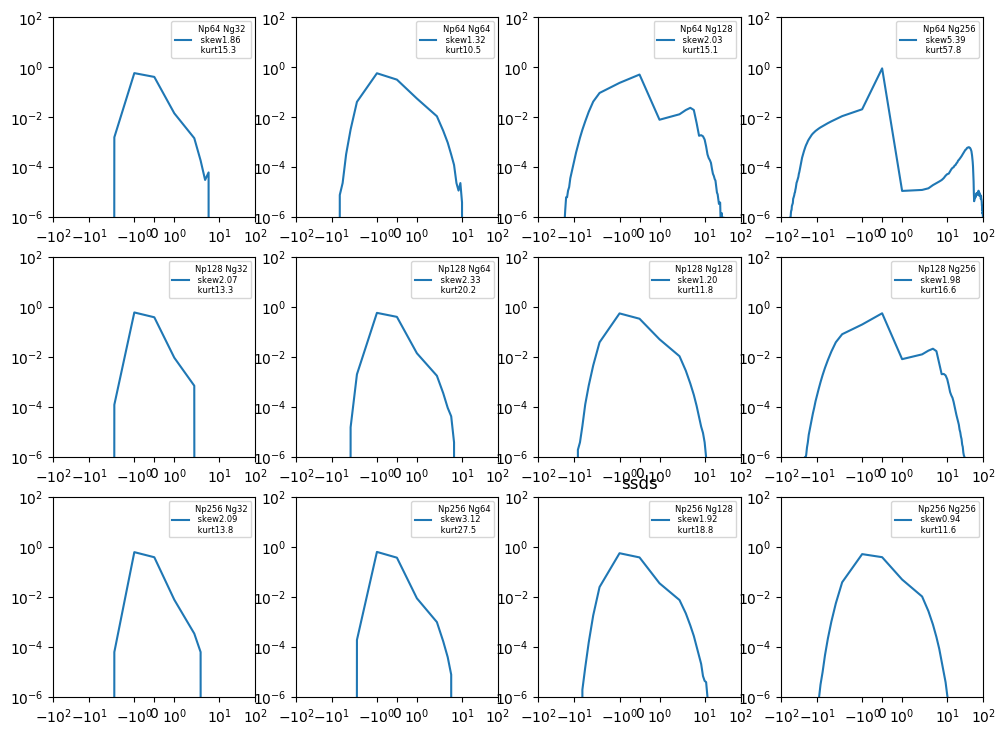

In [40]:
fig=plt.figure(figsize=(12,9), dpi= 100, facecolor='w', edgecolor='k')
plt.title('Countngp-Countcic_box_'+str(Lbox)+'Redshift='+str(RedShift))

plt.subplot(3,4,1)
probd,edges =np.histogram(Res_Ng32_Np64/8.,bins=range(-100,100), density = 1)
plt.plot((edges[0:-1]+edges[1:])/2,probd,
         label='Np64 Ng32 \n skew'+str(skew3264)[0:4]+'\n kurt'+str(kurtosis3264)[0:4])
plt.legend(loc='best',prop={'size': 6})
plt.ylim([1e-6,100])
plt.xlim([-100,100])
plt.yscale('log')
plt.xscale('symlog')
Edge=(edges[0:-1]+edges[1:])/2.
print np.trapz(probd,Edge)



plt.subplot(3,4,2)
probd,edges =np.histogram(Res_Ng64_Np64,bins=range(-100,100), density = 1)
plt.plot((edges[0:-1]+edges[1:])/2,probd,
         label='Np64 Ng64\n skew'+str(skew6464)[0:4]+'\n kurt'+str(kurtosis6464)[0:4])
plt.legend(loc='best',prop={'size': 6})
plt.ylim([1e-6,100])
plt.xlim([-100,100])
plt.yscale('log')
plt.xscale('symlog')
Edge=(edges[0:-1]+edges[1:])/2.
print np.trapz(probd,Edge)

plt.subplot(3,4,3)
probd,edges =np.histogram(Res_Ng128_Np64*8,bins=range(-100,100), density = 1)
plt.plot((edges[0:-1]+edges[1:])/2,probd,
         label='Np64 Ng128\n skew'+str(skew12864)[0:4]+'\n kurt'+str(kurtosis12864)[0:4])
plt.legend(loc='best',prop={'size': 6})
plt.ylim([1e-6,100])
plt.xlim([-100,100])
plt.yscale('log')
plt.xscale('symlog')
Edge=(edges[0:-1]+edges[1:])/2.
print np.trapz(probd,Edge)

plt.subplot(3,4,4)
probd,edges =np.histogram(Res_Ng256_Np64*64,bins=range(-100,100), density = 1)
plt.plot((edges[0:-1]+edges[1:])/2,probd,
         label='Np64 Ng256\n skew'+str(skew25664)[0:4]+'\n kurt'+str(kurtosis25664)[0:4])
plt.legend(loc='best',prop={'size': 6})
plt.ylim([1e-6,100])
plt.xlim([-100,100])
plt.yscale('log')
plt.xscale('symlog')
Edge=(edges[0:-1]+edges[1:])/2.
print np.trapz(probd,Edge)


plt.subplot(3,4,5)
probd,edges =np.histogram(Res_Ng32_Np128/64.,bins=range(-100,100), density = 1)
plt.plot((edges[0:-1]+edges[1:])/2,probd,
         label='Np128 Ng32\n skew'+str(skew32128)[0:4]+'\n kurt'+str(kurtosis32128)[0:4])
plt.legend(loc='best',prop={'size': 6})
plt.ylim([1e-6,100])
plt.xlim([-100,100])
plt.yscale('log')
plt.xscale('symlog')
Edge=(edges[0:-1]+edges[1:])/2.
print np.trapz(probd,Edge)






plt.subplot(3,4,6)
probd,edges =np.histogram(Res_Ng64_Np128/8.,bins=range(-100,100), density = 1)
plt.plot((edges[0:-1]+edges[1:])/2,probd,
         label='Np128 Ng64\n skew'+str(skew64128)[0:4]+'\n kurt'+str(kurtosis64128)[0:4])
plt.legend(loc='best',prop={'size': 6})
plt.ylim([1e-6,100])
plt.xlim([-100,100])
plt.yscale('log')
plt.xscale('symlog')
Edge=(edges[0:-1]+edges[1:])/2.
print np.trapz(probd,Edge)

plt.subplot(3,4,7)
probd,edges =np.histogram(Res_Ng128_Np128,bins=range(-100,100), density = 1)
plt.plot((edges[0:-1]+edges[1:])/2,probd,
         label='Np128 Ng128\n skew'+str(skew128128)[0:4]+'\n kurt'+str(kurtosis128128)[0:4])
plt.legend(loc='best',prop={'size': 6})
plt.ylim([1e-6,100])
plt.xlim([-100,100])
plt.yscale('log')
plt.xscale('symlog')
Edge=(edges[0:-1]+edges[1:])/2.
print np.trapz(probd,Edge)

plt.subplot(3,4,8)
probd,edges =np.histogram(Res_Ng256_Np128*8.,bins=range(-100,100), density = 1)
plt.plot((edges[0:-1]+edges[1:])/2,probd,
         label='Np128 Ng256\n skew'+str(skew256128)[0:4]+'\n kurt'+str(kurtosis256128)[0:4])
plt.legend(loc='best',prop={'size': 6})
plt.ylim([1e-6,100])
plt.xlim([-100,100])
plt.yscale('log')
plt.xscale('symlog')
Edge=(edges[0:-1]+edges[1:])/2.
print np.trapz(probd,Edge)


plt.subplot(3,4,9)
probd,edges =np.histogram(Res_Ng32_Np256/512.,bins=range(-100,100), density = 1)
plt.plot((edges[0:-1]+edges[1:])/2,probd,
         label='Np256 Ng32\n skew'+str(skew32256)[0:4]+'\n kurt'+str(kurtosis32256)[0:4])
plt.legend(loc='best',prop={'size': 6})
plt.ylim([1e-6,100])
plt.xlim([-100,100])
plt.yscale('log')
plt.xscale('symlog')
Edge=(edges[0:-1]+edges[1:])/2.
print np.trapz(probd,Edge)









plt.subplot(3,4,10)
probd,edges =np.histogram(Res_Ng64_Np256/64.,bins=range(-100,100), density = 1)
plt.plot((edges[0:-1]+edges[1:])/2,probd,
         label='Np256 Ng64\n skew'+str(skew64256)[0:4]+'\n kurt'+str(kurtosis64256)[0:4])
plt.legend(loc='best',prop={'size': 6})
plt.ylim([1e-6,100])
plt.yscale('log')
plt.xlim([-100,100])
plt.xscale('symlog')
Edge=(edges[0:-1]+edges[1:])/2.
print np.trapz(probd,Edge)

plt.subplot(3,4,11)
probd,edges =np.histogram(Res_Ng128_Np256/4,bins=range(-100,100), density = 1)
plt.plot((edges[0:-1]+edges[1:])/2,probd,
         label='Np256 Ng128\n skew'+str(skew128256)[0:4]+'\n kurt'+str(kurtosis128256)[0:4])
plt.title('ssds')
plt.legend(loc='best',prop={'size': 6}) 
plt.ylim([1e-6,100])
plt.xlim([-100,100])
plt.xscale('symlog')
plt.yscale('log')
Edge=(edges[0:-1]+edges[1:])/2.
print np.trapz(probd,Edge)

plt.subplot(3,4,12)
probd,edges =np.histogram(Res_Ng256_Np256,bins=range(-100,100), density = 1)
plt.plot((edges[0:-1]+edges[1:])/2,probd,
         label= 'Np256 Ng256\n skew'+str(skew256256)[0:4]+'\n kurt'+str(kurtosis256256)[0:4])
plt.legend(loc='best',prop={'size': 6})
plt.ylim([1e-6,100])
plt.xlim([-100,100])
plt.xscale('symlog')
plt.yscale('log')
Edge=(edges[0:-1]+edges[1:])/2.
print np.trapz(probd,Edge)
plt.savefig('Countngp-Countcic_box_'+str(Lbox)+'Redshift='+str(RedShift)+'.svg')
plt.show()
